In [21]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read dataframe
properties = pd.read_csv('..\data\cleaned_output.csv')
properties.head()

,id,type_of_property,subtype_of_property,province,locality,postalCode,price,number_of_bedrooms,living_area,fully_equipped_kitchen,...,open_fire,terrace,terrace_area,garden,garden_area,total_property_area,total_land_area,number_of_facades,swimming_pool,state_of_the_building
0,10492614,HOUSE,HOUSE,Liège,Saint-Nicolas,4420.0,20000.0,3.0,38.0,1.0,...,0.0,1.0,NaN,NaN,NaN,206.0,194.0,NaN,0.0,good
1,10664145,HOUSE,CHALET,Luxembourg,DURBUY,6940.0,22000.0,2.0,0.0,NaN,...,0.0,1.0,15.0,NaN,NaN,40.0,200.0,4.0,0.0,0
2,10578200,APARTMENT,APARTMENT,Hainaut,La Louviere,7110.0,39000.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,44.0,0.0,2.0,0.0,needs renovating
3,10248737,HOUSE,HOUSE,Liège,Flémalle,4400.0,40000.0,2.0,21.0,0.0,...,0.0,NaN,NaN,NaN,NaN,106.0,110.0,3.0,0.0,needs renovating
4,10576318,HOUSE,HOUSE,Liège,Liège Wandre,4020.0,59000.0,4.0,29.0,0.0,...,0.0,NaN,NaN,NaN,NaN,144.0,80.0,2.0,0.0,needs renovating


In [23]:
# What are the dimensions of my data set?
shape = properties.shape
print("The data set consists of " + str(shape[0]) + " rows and " + str(shape[1]) + " columns.")

The data set consists of 11992 rows and 21 columns.


In [24]:
# What is the quantity of 'x' per column?
missing_value_quantities = {}
print('Total quantity of missing data per column \n')
for column in properties.columns:
    count = pd.isna(properties[column]).sum()
    missing_value_quantities[column] = count
    print(str(column) +': ' + str(missing_value_quantities[column]))

Total quantity of missing data per column 

id: 0
type_of_property: 0
subtype_of_property: 0
province: 1
locality: 0
postalCode: 0
price: 0
number_of_bedrooms: 0
living_area: 0
fully_equipped_kitchen: 2223
furnished: 5830
open_fire: 0
terrace: 3515
terrace_area: 6635
garden: 7599
garden_area: 9076
total_property_area: 297
total_land_area: 2718
number_of_facades: 2659
swimming_pool: 5312
state_of_the_building: 0


From this output I can deduce that it would not be feasible to use the *entire* Dataset to analyse the following attritutes:
* fully equipped kitchen
* furnished
* terrace
* terrace area
* garden
* garden area
* total land area
* number of facades
* swimming pool

Since at least 20% of the properties are missing data for these.

And, I can deduce that using:
* total property area

Will also carry risk since over 2% of the data is missing this information.

Therefore, when analysing an attritube, I will discard the rows with that do not contain data for that attritube.
* e.g. if I want to see the average price per property square meter, I will discard the 297 rows that are missing total property area data and use the remaining 11,695
***


First of all I'd like to see if there is any correlation between the price of a proeprty, and the variables. For each column I will calculate the price with an attribute, or without an attribute, and see the difference. 

Below is a barchart comparing the mean average price of houses in belgium to the mean average price of apartments:

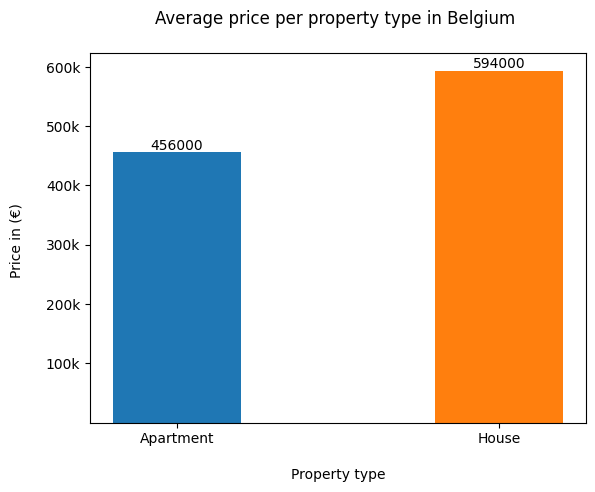

In [25]:
# Calculate average price of an apartment and house

apartments = properties[properties['type_of_property'] == 'APARTMENT']
apartment_average = apartments['price'].mean()
apartment_average = int(apartment_average)

houses = properties[properties['type_of_property'] == 'HOUSE']
house_average = houses['price'].mean()
house_average = int(house_average)

# Add average prices to a dictionary
average_price = {}
average_price['Apartment'] = apartment_average
average_price['House'] = house_average

# Extract the keys of dictionary into respective lists for use in a bar chart
price_keys = list(average_price.keys())
price_values = list(average_price.values())


# Round the averages to nearest thousand for presentation
for price in range(len(price_values)):
    rounded = round(price_values[price], -3)
    price_values[price] = rounded

# Plot the bar chart comparing average price of a property by type
plt.bar(price_keys, price_values, width = 0.4, color = 'red')
plt.title('Average price per property type in Belgium \n')
plt.xlabel('\nProperty type')
plt.ylabel('Price in (€) \n')
plt.bar_label(plt.bar(price_keys, price_values, width = 0.4, color = ['tab:blue', 'tab:orange']))
plt.yticks([100000, 200000 , 300000 , 400000 , 500000 , 600000] , ['100k' , '200k' , '300k' , '400k' , '500k' , '600k'])
plt.savefig('../assets/avg_price_per_type.png')
plt.show()



Clearly an average house is more expensive than an apartment, by almost 140,000€.

Below I begin to build new dataframes that exclude non-existant data for each variable.

In [26]:
# Write new dataframes containing the numerical data and excluding empty data
# Continuous data is written between 1 and infinity, discrete data is written between 0 (no) and 1 (yes)
open_fire = properties.loc[properties['open_fire'].between(0,1, inclusive='both')]
bedrooms = properties.loc[properties['number_of_bedrooms'].between(1,np.inf, inclusive='both')]
living_area = properties.loc[properties['living_area'].between(1,np.inf, inclusive='both')]
kitchen = properties.loc[properties['fully_equipped_kitchen'].between(0,1, inclusive='both')]
terrace = properties.loc[properties['terrace'].between(0,1, inclusive='both')]
terrace_area = properties.loc[properties['terrace_area'].between(1,np.inf, inclusive='both')]
garden = properties.loc[properties['garden'].between(0, np.inf, inclusive='both')]
garden_area = properties.loc[properties['garden_area'].between(1,np.inf, inclusive='both')]
property_area =  properties.loc[properties['total_property_area'].between(1,np.inf, inclusive='both')]
land_area =  properties.loc[properties['total_land_area'].between(1,np.inf, inclusive='both')]
facades =  properties.loc[properties['number_of_facades'].between(1,np.inf, inclusive='both')]
swimming =  properties.loc[properties['swimming_pool'].isin([1])]
state =  properties.loc[properties['state_of_the_building'].isin(['good', 'as_new', 'needs renovating' , 'just renovated'])]
living_area.shape


(6353, 21)

Using my newly constructred dataframes, I can start to analyse price vs. variables

First I begin with total property area, for properties valued between 0€ and 2m€, and with a maximum property space of 1000m²

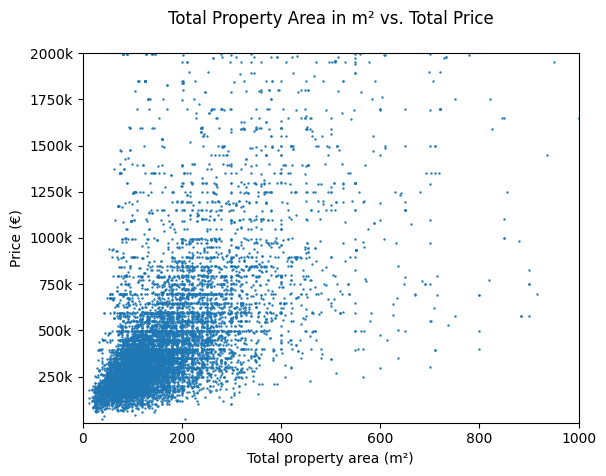

In [27]:
# Subframe 'total property area' and 'price' columns
total_area_data = properties['total_property_area']
price_total_area_data = properties['price']

# Plot property area vs price
plt.scatter(total_area_data, price_total_area_data, s=0.5)
plt.xlim(0, 1000)
plt.ylim(0,2000000)
plt.yscale('linear') 
plt.yticks([250000, 500000 , 750000 , 1000000 , 1250000 , 1500000, 1750000 , 2000000] , ['250k' , '500k' , '750k' , '1000k' , '1250k' , '1500k', '1750k', '2000k'])
plt.xlabel('Total property area (m²)')
plt.ylabel('Price (€)')
plt.title('Total Property Area in m² vs. Total Price\n')
plt.savefig('../assets/property_area_vs_price.png')
plt.show()


Clearly there is a positive correlation here, though it is difficult to visualise the density in the sub 0-1m€ and sub 0-400m² ranges.

The chart below zeroes-in on the dense section to visualise where the data lies.

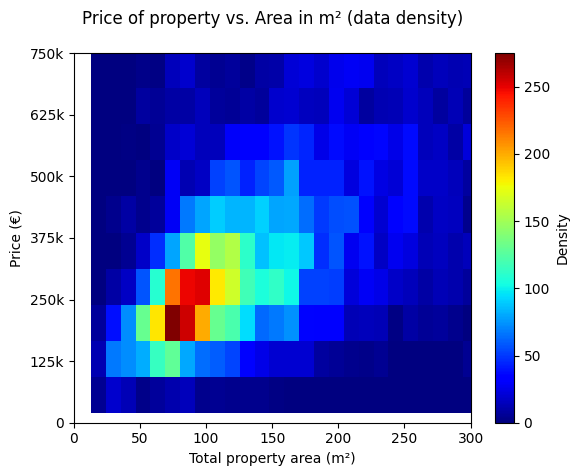

In [28]:
# Remove rows with nan-data to use heatmap
nanless_prop_area = properties.loc[properties['total_property_area'].between(1,np.inf, inclusive='both')]

# Plot a heatmap displaying data density of previous scatter chart
heatmap, xedges, yedges, _ = plt.hist2d(nanless_prop_area['total_property_area'], nanless_prop_area['price'], bins=150, cmap='jet')
plt.colorbar(label='Density')
plt.xlim(0, 300)
plt.ylim(0,100000)
plt.yscale('linear') 
plt.yticks([0, 125000, 250000, 375000, 500000, 625000, 750000] , ['0' , '125k', '250k' , '375k', '500k' , '625k', '750k'])
plt.xlabel('Total property area (m²)')
plt.ylabel('Price (€)')
plt.title('Price of property vs. Area in m² (data density)\n')
plt.savefig('../assets/property_data_vs_price_density.png')
plt.show()

But neither of these massively help me visualise the actual relationship between price and area. To do this, I will want to calulcate the average price per square meter of a house.

In [30]:
# Add price per sq m to the dataframe
properties['price_per_sqm'] = properties['price'] / properties['total_property_area']

# Redefine apartments and houses subframes
apartments = properties[properties['type_of_property'] == 'APARTMENT']
houses = properties[properties['type_of_property'] == 'HOUSE']

# Calculate average price per sqm for entire dataframe and round it to 2 d.p.
# Label is belg_avg
price_per_sqm = nanless_prop_area['price'].sum() / nanless_prop_area['total_property_area'].sum()
belg_avg = round(price_per_sqm.mean(), 2)
print("The average price of property across all of Belgium is "+ str(belg_avg) +" €/m².")
properties.head()

The average price of property across all of Belgium is 3003.5 €/m².


,id,type_of_property,subtype_of_property,province,locality,postalCode,price,number_of_bedrooms,living_area,fully_equipped_kitchen,...,terrace,terrace_area,garden,garden_area,total_property_area,total_land_area,number_of_facades,swimming_pool,state_of_the_building,price_per_sqm
0,10492614,HOUSE,HOUSE,Liège,Saint-Nicolas,4420.0,20000.0,3.0,38.0,1.0,...,1.0,NaN,NaN,NaN,206.0,194.0,NaN,0.0,good,97.087379
1,10664145,HOUSE,CHALET,Luxembourg,DURBUY,6940.0,22000.0,2.0,0.0,NaN,...,1.0,15.0,NaN,NaN,40.0,200.0,4.0,0.0,0,550.000000
2,10578200,APARTMENT,APARTMENT,Hainaut,La Louviere,7110.0,39000.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,44.0,0.0,2.0,0.0,needs renovating,886.363636
3,10248737,HOUSE,HOUSE,Liège,Flémalle,4400.0,40000.0,2.0,21.0,0.0,...,NaN,NaN,NaN,NaN,106.0,110.0,3.0,0.0,needs renovating,377.358491
4,10576318,HOUSE,HOUSE,Liège,Liège Wandre,4020.0,59000.0,4.0,29.0,0.0,...,NaN,NaN,NaN,NaN,144.0,80.0,2.0,0.0,needs renovating,409.722222


I can try and break this down by province, too.

In [31]:
# Make subframe of propertiers in each region
brussels = properties[properties['province'] == 'Brussels']
west_flanders = properties[properties['province'] == 'West Flanders']
east_flanders = properties[properties['province'] == 'East Flanders']
antwerp = properties[properties['province'] == 'Antwerp']
liege = properties[properties['province'] == 'Liège']
flemish_brabant = properties[properties['province'] == 'Flemish Brabant']
hainaut = properties[properties['province'] == 'Hainaut']
walloon_brabant = properties[properties['province'] == 'Walloon Brabant']
luxembourg = properties[properties['province'] == 'Luxembourg']
namur = properties[properties['province'] == 'Namur']
limburg = properties[properties['province'] == 'Limburg']

# Make list of of subframes and list of respective strings.
# province_names contains 'Belgium' to keep list lengths equal
province_dfs = [brussels, west_flanders, east_flanders, antwerp, liege, flemish_brabant, hainaut, walloon_brabant, luxembourg, namur, limburg]
province_names = ['Belgium', 'Brussels', 'West Flanders', 'East Flanders', 'Antwerp', 'Liège', 'Flemish Brabant', 'Hainaut', 'Walloon Brabant', 'Luxembourg', 'Namur', 'Limburg']

# Create dictionary that adds key of provinces, to their respective price per sqm averages
province_sqms = {}
province_sqms['Belgium'] = round(price_per_sqm.mean(), 2)
for i in range(len(province_dfs)):
    prov_avg = province_dfs[i]['price_per_sqm'].mean()
    province_sqms[province_names[i+1]] = round(prov_avg, 2)
    print("The average price of property in " + province_names[i+1] + " is " + str(round(prov_avg, 2)) +" €/m².")

The average price of property in Brussels is 3819.13 €/m².
The average price of property in West Flanders is 5203.27 €/m².
The average price of property in East Flanders is 2564.81 €/m².
The average price of property in Antwerp is 3067.77 €/m².
The average price of property in Liège is 1872.08 €/m².
The average price of property in Flemish Brabant is 2973.16 €/m².
The average price of property in Hainaut is 1705.16 €/m².
The average price of property in Walloon Brabant is 2914.33 €/m².
The average price of property in Luxembourg is 1870.88 €/m².
The average price of property in Namur is 2068.91 €/m².
The average price of property in Limburg is 2510.84 €/m².


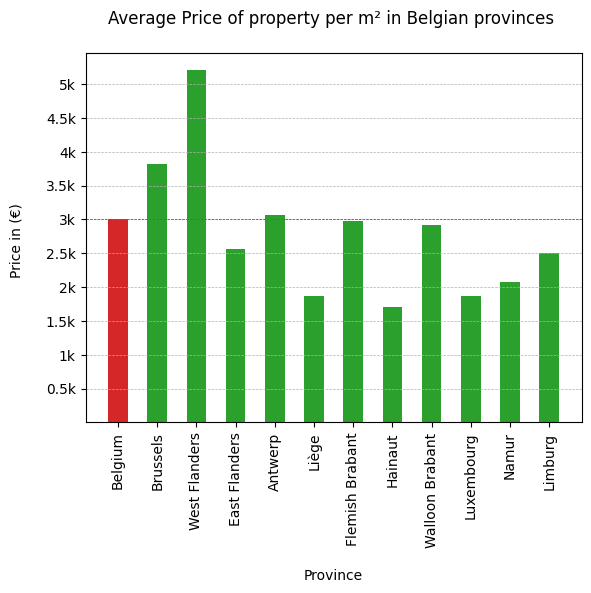

In [32]:
# Append province price per sqm averages to a list for use in a bar chart
province_sqm_avgs = []
for key, value in province_sqms.items():
    try:
        province_sqm_avgs.append(value)
    except:
        pass

# Plot bar chart of average price per sqm per region
bar_colours2 = ['tab:green', 'tab:green']
bar_colours = ['tab:red', *bar_colours2, *bar_colours2, *bar_colours2, *bar_colours2, *bar_colours2, *bar_colours2, ]
plt.bar(province_names, province_sqm_avgs, width = 0.5, color = bar_colours)
plt.title('Average Price of property per m² in Belgian provinces \n')
plt.xlabel('\nProvince')
plt.ylabel('Price in (€) \n')
plt.xticks(rotation='vertical')
first_bar_height = province_sqm_avgs[0]
plt.axhline(first_bar_height, color='red', linestyle='--', linewidth=0.5)
plt.yticks([500, 1000 , 1500 , 2000 , 2500 , 3000, 3500, 4000, 4500, 5000],['0.5k' , '1k', '1.5k', '2k', '2.5k', '3k', '3.5k', '4k', '4.5k', '5k'])
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.savefig('../assets/avg_price_per_sqm_per_province.png')
plt.show()

From the above graph we can see that West Flanders contains by far the most expensive properties by €/m² in Belgium. Other than Brussels, every other province is cheaper than the national average. 

But maybe we can break this down by property type?

In [33]:
# Calculate the average price per sqm of apartments and houses in Belgium
apartment_sqm = apartments['price_per_sqm']
apartment_sqm_mean = apartment_sqm.mean()
apartment_sqm_mean = round(apartment_sqm_mean, 2)


house_sqm = houses['price_per_sqm']
house_sqm_mean = house_sqm.mean()
house_sqm_mean = round(house_sqm_mean, 2)

print("The average price for an apartment in Belgium is "+ str(round(apartment_sqm_mean, 2)) +" €/m².")
print("The average price for a house in Belgium is "+ str(round(house_sqm_mean, 2)) +" €/m².")

The average price for an apartment in Belgium is 4159.99 €/m².
The average price for a house in Belgium is 2387.26 €/m².


So we can see that apartments are far more expensive per m² than houses. Does this vary per region?


In [34]:

# Group apartments/houses by province and calculate the mean price per sqm
apartments_per_sqm = apartments.groupby('province')['price_per_sqm'].mean()
houses_per_sqm = houses.groupby('province')['price_per_sqm'].mean()

# Convert to list which is ordered by province alphabetically
apartments_per_sqm_list = apartments_per_sqm.tolist()
houses_per_sqm_list = houses_per_sqm.tolist()
for i in range(len(apartments_per_sqm_list)):
    apartments_per_sqm_list[i] = round(apartments_per_sqm_list[i], 2)
for i in range(len(houses_per_sqm_list)):
    houses_per_sqm_list[i] = round(houses_per_sqm_list[i], 2)


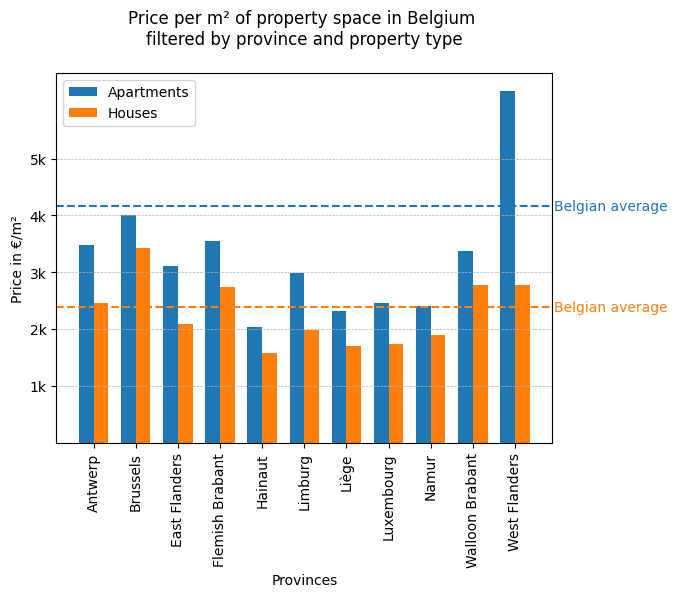

In [35]:
# Extract the keys and values from the dictionary
groups = ('Apartments', 'Houses')
province_names = ['Brussels', 'West Flanders', 'East Flanders', 'Antwerp', 'Liège', 'Flemish Brabant', 'Hainaut', 'Walloon Brabant', 'Luxembourg', 'Namur', 'Limburg']
province_names.sort()

# Create the figure and axis objects
x = np.arange(len(apartments_per_sqm_list))
fig, ax = plt.subplots()

# Bars and colors
bar1 = ax.bar(x, apartments_per_sqm_list, width=0.35, label='Apartments')
bar2 = ax.bar(x + 0.35, houses_per_sqm_list, width=0.35, label='Houses')

ax.set_xlabel('Provinces')
ax.set_title('Price per m² of property space in Belgium \nfiltered by province and property type\n')
ax.set_ylabel('Price in €/m²')
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
belg_apart_height = apartments_per_sqm_list[0]
belg_house_height = houses_per_sqm_list[0]
plt.axhline(apartment_sqm_mean, color='#1f77b4', linestyle='--')
plt.text(11.1, apartment_sqm_mean, 'Belgian average', color='#1f77b4', ha='left', va='center')
plt.axhline(house_sqm_mean, color='#ff7f0e', linestyle='--')
plt.text(11.1, house_sqm_mean, 'Belgian average', color='#ff7f0e', ha='left', va='center')
plt.yticks([ 1000 ,  2000 ,  3000,  4000,  5000],[ '1k', '2k',  '3k', '4k',  '5k'])
ax.set_xticks(x + 0.175)
ax.set_xticklabels(province_names)
ax.legend()
plt.savefig('../assets/avg_price_per_sqm_per_type_filtered.png')
plt.show()